In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mdd_lrr.utils import backtrack, l2_prox, ipalm, alpha_type1, alpha_type2

In [4]:
class mdd_xlr(): 
    
    def __init__(self, d, ns, nr, nk, dtype=None): 
        self.d = d.reshape(ns, nr)
        self.xshape = [(nr, nk), (nk, nr)]
        
    def forward(self, x): 
        ret = self.d
        for idx, item in enumerate(x):
            ret = ret.dot(item.reshape(self.xshape[idx]))
        return ret.ravel()
    
    def adjoint(self, res, xx, idx): 
        
        res = res.reshape(self.d.shape)
        if 0 == idx:
            ret = self.d.conj().T.dot(res).dot(xx[1].reshape(self.xshape[1]).conj().T)
        if 1 == idx:
            ret = self.d.dot(xx[0].reshape(self.xshape[0])).conj().T.dot(res)  
        return ret.ravel()

In [5]:
ns, nr, nk = 111, 101, 101//10
d = np.random.rand(ns, nr) + np.random.rand(ns, nr)*1j

l_t = np.random.rand(nr, nk) + np.random.rand(nr, nk)*1j
r_t = np.random.rand(nk, nr) + np.random.rand(nk, nr)*1j

u = d.dot(l_t).dot(r_t).ravel()

In [29]:
l0 = np.random.rand(nr*nk) + np.random.rand(nr*nk)*1j
r0 = np.random.rand(nk*nr) + np.random.rand(nk*nr)*1j

In [7]:
Op = mdd_xlr(d, ns, nr, nk)

## Gradient accuracy test

In [30]:
res = Op.forward([l0, r0])-u
misfit = res.dot(res.conj()).real
misfit = misfit*0.5

grad_l = Op.adjoint(res, [l0, r0], 0)
grad_r = Op.adjoint(res, [l0, r0], 1)

In [34]:
delta = 1e-5
num_try = len(l0)//2

for it in range(num_try):
    
    q = np.random.randint(0, len(l0))
    r_or_i = np.random.randint(0,2)
    l_or_u = np.random.randint(0,2)
              
    if 0 == r_or_i: 
        delta1 = delta
    else:
        delta1 = delta*1j
        
    if 0 == l_or_u:    
        l0[q] = l0[q] + delta1    
        grad = grad_l[q]
    else:
        r0[q] = r0[q] + delta1
        grad = grad_r[q]      
            
    res = Op.forward([l0, r0])-u
    misfit_new = res.dot(res.conj()).real
    misfit_new = misfit_new*0.5
    
    if 0 == l_or_u:    
        l0[q] = l0[q] - delta1 
    else:
        r0[q] = r0[q] - delta1

    print("%20.4f%20.4f"%((misfit_new-misfit)/delta, grad.real if 0==r_or_i else grad.imag))

         -22787.9994         -22788.0186
         -31609.0398         -31609.0657
         -15138.4890         -15138.5099
         132597.2475         132595.7472
         -29841.8574         -29841.8817
         144114.3729         144112.8192
         -34297.0029         -34297.0211
        -101464.7514        -101466.2223
         -16858.4056         -16858.4286
         -15216.1844         -15216.2048
        -489982.2518        -489983.5152
          34481.7199          34480.1665
        -201664.6937        -201666.0549
         166602.1883         166600.6776
         -14453.5981         -14453.6179
         117120.0342         117118.5353
         -15554.4959         -15554.5202
         -56139.9214         -56139.9436
         -36600.7142         -36600.7343
         -13421.1592         -13422.7137
         -37539.7801         -37539.8037
         -27786.5157         -27786.5404
         -28250.8157         -28250.8378
          -9652.4417          -9652.4630
        -296286.

          -7160.3790          -7160.4032
           2699.7976           2699.7749
          -4495.0865          -4495.1101
        -677078.1428        -677079.6549
         115281.0566         115279.6378
         781002.2622         781000.7920
          -8250.1538          -8250.1750
         -25558.6833         -25558.7081
          -3759.3812          -3759.4055
         -37703.5223         -37703.5445
        -392656.5297        -392657.9995
         -27962.5170         -27962.5416
         150831.8126         150830.2570
         -37333.3789         -37333.4037
        -278498.0454        -278499.7557
        -350580.9881        -350582.4083
        -205248.6017        -205250.1147
        -210694.6371        -210696.1371
         -29176.6502         -29176.6744
         -39666.1654         -39666.1908
         -11323.1324         -11323.1553
         -43266.9103         -43266.9367
         -27408.4032         -27408.4266
          97619.9746          97618.4197
          98943.

## Gradient accuracy test finished

In [12]:
beta = [None, None]

tau = [1e-1, 1e-1]

prox = [l2_prox, l2_prox]


In [14]:
ret = ipalm(Op, u, prox, tau, alpha_type1(), iter_lim=3000, x0=[l0, r0], tol=1e-5, show=True)

niter       data_residual           norm_grad       rel_grad_diff

    0             735.911        15607052.483            1.000000
    1             640.647         8754092.700            0.416338
    2             605.827          315147.038            0.954495
    3             602.504           14814.756            0.801095
    4             599.272            7462.225            0.092600
    5             596.081            7343.727            0.009622
    6             592.929            7246.188            0.009349
    7             589.817            7151.483            0.009306
    8             586.744            7059.506            0.009264
    9             583.709            6970.188            0.009222
   10             580.712            6883.462            0.009181
   11             577.753            6799.263            0.009139
   12             574.830            6717.525            0.009098
   13             571.943            6638.185            0.009057
   14    

  211             350.341            3721.073            0.003855
  212             349.985            3717.957            0.003837
  213             349.631            3714.853            0.003820
  214             349.280            3711.761            0.003802
  215             348.932            3708.681            0.003785
  216             348.586            3705.613            0.003768
  217             348.242            3702.556            0.003751
  218             347.902            3699.511            0.003734
  219             347.563            3696.478            0.003717
  220             347.228            3693.456            0.003700
  221             346.894            3690.445            0.003683
  222             346.564            3687.446            0.003666
  223             346.235            3684.457            0.003649
  224             345.909            3681.480            0.003633
  225             345.585            3678.513            0.003616
  226     

  439             305.607            3194.059            0.001658
  440             305.494            3192.238            0.001653
  441             305.382            3190.420            0.001649
  442             305.270            3188.605            0.001644
  443             305.159            3186.792            0.001640
  444             305.048            3184.983            0.001636
  445             304.937            3183.176            0.001631
  446             304.827            3181.371            0.001627
  447             304.717            3179.570            0.001623
  448             304.607            3177.771            0.001618
  449             304.498            3175.974            0.001614
  450             304.389            3174.181            0.001610
  451             304.280            3172.390            0.001606
  452             304.172            3170.602            0.001602
  453             304.064            3168.816            0.001597
  454     

  667             286.700            2835.753            0.001017
  668             286.638            2834.386            0.001015
  669             286.576            2833.020            0.001013
  670             286.514            2831.656            0.001011
  671             286.452            2830.293            0.001010
  672             286.390            2828.932            0.001008
  673             286.329            2827.572            0.001006
  674             286.267            2826.213            0.001004
  675             286.206            2824.856            0.001003
  676             286.145            2823.501            0.001001
  677             286.084            2822.147            0.000999
  678             286.023            2820.794            0.000997
  679             285.962            2819.443            0.000996
  680             285.901            2818.093            0.000994
  681             285.841            2816.745            0.000992
  682     

  794             279.669            2673.034            0.000829
  795             279.620            2671.833            0.000827
  796             279.570            2670.634            0.000826
  797             279.521            2669.436            0.000825
  798             279.472            2668.239            0.000824
  799             279.423            2667.043            0.000823
  800             279.374            2665.849            0.000821
  801             279.325            2664.656            0.000820
  802             279.276            2663.463            0.000819
  803             279.228            2662.272            0.000818
  804             279.179            2661.082            0.000817
  805             279.130            2659.894            0.000815
  806             279.082            2658.706            0.000814
  807             279.033            2657.520            0.000813
  808             278.985            2656.334            0.000812
  809     

 1039             269.481            2409.964            0.000609
 1040             269.445            2409.003            0.000608
 1041             269.410            2408.044            0.000608
 1042             269.375            2407.086            0.000607
 1043             269.340            2406.128            0.000607
 1044             269.305            2405.171            0.000606
 1045             269.269            2404.215            0.000605
 1046             269.234            2403.259            0.000605
 1047             269.199            2402.305            0.000604
 1048             269.164            2401.351            0.000603
 1049             269.129            2400.398            0.000603
 1050             269.095            2399.446            0.000602
 1051             269.060            2398.495            0.000601
 1052             269.025            2397.545            0.000601
 1053             268.990            2396.595            0.000600
 1054     

 1284             261.870            2197.082            0.000487
 1285             261.843            2196.297            0.000487
 1286             261.815            2195.512            0.000486
 1287             261.788            2194.728            0.000486
 1288             261.760            2193.945            0.000486
 1289             261.733            2193.162            0.000485
 1290             261.706            2192.380            0.000485
 1291             261.678            2191.599            0.000485
 1292             261.651            2190.818            0.000484
 1293             261.624            2190.038            0.000484
 1294             261.597            2189.258            0.000483
 1295             261.570            2188.479            0.000483
 1296             261.542            2187.701            0.000483
 1297             261.515            2186.923            0.000482
 1298             261.488            2186.146            0.000482
 1299     

 1411             258.572            2102.117            0.000444
 1412             258.548            2101.405            0.000444
 1413             258.523            2100.694            0.000444
 1414             258.499            2099.984            0.000443
 1415             258.474            2099.274            0.000443
 1416             258.450            2098.565            0.000443
 1417             258.425            2097.856            0.000442
 1418             258.401            2097.148            0.000442
 1419             258.376            2096.441            0.000442
 1420             258.352            2095.734            0.000441
 1421             258.327            2095.027            0.000441
 1422             258.303            2094.321            0.000441
 1423             258.279            2093.616            0.000441
 1424             258.254            2092.911            0.000440
 1425             258.230            2092.207            0.000440
 1426     

 1538             255.605            2015.950            0.000409
 1539             255.583            2015.303            0.000409
 1540             255.561            2014.657            0.000409
 1541             255.538            2014.012            0.000409
 1542             255.516            2013.367            0.000408
 1543             255.494            2012.722            0.000408
 1544             255.472            2012.078            0.000408
 1545             255.450            2011.435            0.000408
 1546             255.428            2010.792            0.000407
 1547             255.406            2010.149            0.000407
 1548             255.384            2009.507            0.000407
 1549             255.362            2008.866            0.000407
 1550             255.340            2008.224            0.000407
 1551             255.318            2007.584            0.000406
 1552             255.296            2006.944            0.000406
 1553     

 1775             250.768            1875.294            0.000359
 1776             250.749            1874.751            0.000359
 1777             250.730            1874.207            0.000359
 1778             250.711            1873.664            0.000359
 1779             250.693            1873.122            0.000359
 1780             250.674            1872.580            0.000358
 1781             250.655            1872.038            0.000358
 1782             250.637            1871.496            0.000358
 1783             250.618            1870.955            0.000358
 1784             250.599            1870.415            0.000358
 1785             250.581            1869.874            0.000357
 1786             250.562            1869.335            0.000357
 1787             250.543            1868.795            0.000357
 1788             250.525            1868.256            0.000357
 1789             250.506            1867.717            0.000357
 1790     

 2009             246.688            1758.030            0.000321
 2010             246.672            1757.569            0.000321
 2011             246.656            1757.109            0.000321
 2012             246.640            1756.648            0.000321
 2013             246.624            1756.189            0.000321
 2014             246.608            1755.729            0.000320
 2015             246.591            1755.270            0.000320
 2016             246.575            1754.811            0.000320
 2017             246.559            1754.353            0.000320
 2018             246.543            1753.894            0.000320
 2019             246.527            1753.436            0.000320
 2020             246.511            1752.979            0.000320
 2021             246.495            1752.522            0.000319
 2022             246.479            1752.065            0.000319
 2023             246.463            1751.608            0.000319
 2024     

 2237             243.226            1660.854            0.000291
 2238             243.212            1660.460            0.000291
 2239             243.198            1660.067            0.000290
 2240             243.184            1659.675            0.000290
 2241             243.169            1659.282            0.000290
 2242             243.155            1658.890            0.000290
 2243             243.141            1658.498            0.000290
 2244             243.127            1658.106            0.000290
 2245             243.113            1657.715            0.000290
 2246             243.099            1657.324            0.000290
 2247             243.084            1656.933            0.000289
 2248             243.070            1656.543            0.000289
 2249             243.056            1656.152            0.000289
 2250             243.042            1655.762            0.000289
 2251             243.028            1655.373            0.000289
 2252     

 2471             240.090            1575.855            0.000264
 2472             240.077            1575.520            0.000264
 2473             240.065            1575.186            0.000263
 2474             240.052            1574.852            0.000263
 2475             240.039            1574.518            0.000263
 2476             240.027            1574.184            0.000263
 2477             240.014            1573.851            0.000263
 2478             240.002            1573.517            0.000263
 2479             239.989            1573.185            0.000263
 2480             239.976            1572.852            0.000263
 2481             239.964            1572.519            0.000263
 2482             239.951            1572.187            0.000262
 2483             239.939            1571.855            0.000262
 2484             239.926            1571.523            0.000262
 2485             239.914            1571.192            0.000262
 2486     

 2713             237.203            1501.290            0.000239
 2714             237.192            1501.007            0.000239
 2715             237.181            1500.725            0.000239
 2716             237.169            1500.442            0.000238
 2717             237.158            1500.160            0.000238
 2718             237.147            1499.878            0.000238
 2719             237.136            1499.596            0.000238
 2720             237.124            1499.315            0.000238
 2721             237.113            1499.033            0.000238
 2722             237.102            1498.752            0.000238
 2723             237.091            1498.471            0.000238
 2724             237.080            1498.190            0.000238
 2725             237.068            1497.910            0.000238
 2726             237.057            1497.629            0.000238
 2727             237.046            1497.349            0.000237
 2728     

 2841             235.799            1466.656            0.000227
 2842             235.789            1466.398            0.000226
 2843             235.778            1466.140            0.000226
 2844             235.767            1465.881            0.000226
 2845             235.757            1465.624            0.000226
 2846             235.746            1465.366            0.000226
 2847             235.735            1465.108            0.000226
 2848             235.725            1464.851            0.000226
 2849             235.714            1464.594            0.000226
 2850             235.704            1464.337            0.000226
 2851             235.693            1464.080            0.000226
 2852             235.682            1463.823            0.000226
 2853             235.672            1463.567            0.000225
 2854             235.661            1463.310            0.000225
 2855             235.650            1463.054            0.000225
 2856     

 2967             234.490            1435.491            0.000215
 2968             234.479            1435.255            0.000215
 2969             234.469            1435.019            0.000215
 2970             234.459            1434.783            0.000215
 2971             234.449            1434.547            0.000215
 2972             234.439            1434.311            0.000215
 2973             234.429            1434.076            0.000214
 2974             234.419            1433.841            0.000214
 2975             234.409            1433.606            0.000214
 2976             234.399            1433.371            0.000214
 2977             234.389            1433.136            0.000214
 2978             234.378            1432.901            0.000214
 2979             234.368            1432.667            0.000214
 2980             234.358            1432.432            0.000214
 2981             234.348            1432.198            0.000214
 2982     

In [15]:
ret = ipalm(Op, u, prox, tau, alpha_type2(), iter_lim=3000, x0=[l0, r0], tol=1e-5, show=True)

niter       data_residual           norm_grad       rel_grad_diff

    0             735.911        15607052.483            1.000000
    1             644.196         9263770.675            0.380636
    2             605.386          334966.091            0.954678
    3             602.062           15612.110            0.810278
    4             598.836            7450.123            0.101123
    5             595.651            7328.931            0.009653
    6             592.506            7231.821            0.009341
    7             589.400            7137.541            0.009298
    8             586.332            7045.976            0.009256
    9             583.303            6957.061            0.009214
   10             580.312            6870.727            0.009173
   11             577.358            6786.908            0.009131
   12             574.440            6705.541            0.009090
   13             571.559            6626.563            0.009049
   14    

  209             351.020            3726.680            0.003888
  210             350.659            3723.540            0.003870
  211             350.300            3720.412            0.003853
  212             349.944            3717.297            0.003835
  213             349.590            3714.194            0.003817
  214             349.240            3711.103            0.003800
  215             348.891            3708.024            0.003783
  216             348.546            3704.957            0.003766
  217             348.203            3701.902            0.003748
  218             347.862            3698.858            0.003731
  219             347.524            3695.825            0.003714
  220             347.189            3692.804            0.003697
  221             346.856            3689.795            0.003681
  222             346.525            3686.796            0.003664
  223             346.197            3683.809            0.003647
  224     

  438             305.704            3195.379            0.001662
  439             305.591            3193.556            0.001657
  440             305.479            3191.736            0.001653
  441             305.367            3189.919            0.001648
  442             305.255            3188.104            0.001644
  443             305.143            3186.292            0.001640
  444             305.032            3184.483            0.001635
  445             304.922            3182.676            0.001631
  446             304.811            3180.873            0.001627
  447             304.701            3179.071            0.001622
  448             304.592            3177.273            0.001618
  449             304.483            3175.477            0.001614
  450             304.374            3173.684            0.001610
  451             304.265            3171.894            0.001605
  452             304.157            3170.106            0.001601
  453     

  666             286.752            2836.724            0.001018
  667             286.690            2835.355            0.001017
  668             286.628            2833.988            0.001015
  669             286.566            2832.623            0.001013
  670             286.504            2831.259            0.001011
  671             286.442            2829.896            0.001009
  672             286.380            2828.535            0.001008
  673             286.319            2827.176            0.001006
  674             286.257            2825.818            0.001004
  675             286.196            2824.461            0.001002
  676             286.135            2823.106            0.001001
  677             286.074            2821.752            0.000999
  678             286.013            2820.400            0.000997
  679             285.952            2819.049            0.000996
  680             285.891            2817.700            0.000994
  681     

  869             276.164            2585.802            0.000746
  870             276.120            2584.685            0.000745
  871             276.076            2583.569            0.000744
  872             276.032            2582.454            0.000743
  873             275.988            2581.340            0.000742
  874             275.944            2580.226            0.000741
  875             275.900            2579.114            0.000740
  876             275.857            2578.003            0.000739
  877             275.813            2576.893            0.000738
  878             275.770            2575.784            0.000737
  879             275.726            2574.676            0.000736
  880             275.683            2573.570            0.000735
  881             275.640            2572.464            0.000734
  882             275.596            2571.359            0.000733
  883             275.553            2570.255            0.000732
  884     

 1109             267.097            2344.416            0.000567
 1110             267.065            2343.511            0.000567
 1111             267.032            2342.607            0.000566
 1112             266.999            2341.704            0.000566
 1113             266.967            2340.801            0.000565
 1114             266.934            2339.900            0.000565
 1115             266.902            2338.999            0.000564
 1116             266.870            2338.098            0.000564
 1117             266.837            2337.199            0.000563
 1118             266.805            2336.300            0.000562
 1119             266.772            2335.402            0.000562
 1120             266.740            2334.505            0.000561
 1121             266.708            2333.609            0.000561
 1122             266.676            2332.713            0.000560
 1123             266.644            2331.818            0.000560
 1124     

 1329             260.654            2162.131            0.000471
 1330             260.627            2161.373            0.000470
 1331             260.601            2160.616            0.000470
 1332             260.575            2159.859            0.000470
 1333             260.549            2159.103            0.000469
 1334             260.522            2158.348            0.000469
 1335             260.496            2157.593            0.000469
 1336             260.470            2156.839            0.000468
 1337             260.444            2156.085            0.000468
 1338             260.417            2155.332            0.000468
 1339             260.391            2154.580            0.000467
 1340             260.365            2153.828            0.000467
 1341             260.339            2153.077            0.000467
 1342             260.313            2152.326            0.000466
 1343             260.287            2151.576            0.000466
 1344     

 1546             255.423            2010.602            0.000407
 1547             255.401            2009.960            0.000407
 1548             255.379            2009.318            0.000407
 1549             255.357            2008.676            0.000407
 1550             255.335            2008.035            0.000406
 1551             255.313            2007.395            0.000406
 1552             255.291            2006.755            0.000406
 1553             255.269            2006.115            0.000406
 1554             255.247            2005.476            0.000406
 1555             255.225            2004.837            0.000405
 1556             255.203            2004.199            0.000405
 1557             255.181            2003.561            0.000405
 1558             255.159            2002.924            0.000405
 1559             255.137            2002.288            0.000404
 1560             255.116            2001.651            0.000404
 1561     

 1766             250.933            1880.043            0.000361
 1767             250.914            1879.495            0.000361
 1768             250.895            1878.949            0.000361
 1769             250.877            1878.402            0.000360
 1770             250.858            1877.856            0.000360
 1771             250.839            1877.311            0.000360
 1772             250.820            1876.766            0.000360
 1773             250.801            1876.221            0.000360
 1774             250.783            1875.676            0.000359
 1775             250.764            1875.132            0.000359
 1776             250.745            1874.589            0.000359
 1777             250.726            1874.045            0.000359
 1778             250.707            1873.503            0.000359
 1779             250.689            1872.960            0.000358
 1780             250.670            1872.418            0.000358
 1781     

 1981             247.142            1770.922            0.000325
 1982             247.126            1770.452            0.000325
 1983             247.110            1769.982            0.000325
 1984             247.093            1769.513            0.000325
 1985             247.077            1769.044            0.000325
 1986             247.060            1768.576            0.000325
 1987             247.044            1768.108            0.000324
 1988             247.027            1767.640            0.000324
 1989             247.011            1767.172            0.000324
 1990             246.995            1766.705            0.000324
 1991             246.978            1766.238            0.000324
 1992             246.962            1765.772            0.000324
 1993             246.945            1765.305            0.000324
 1994             246.929            1764.840            0.000323
 1995             246.913            1764.374            0.000323
 1996     

 2207             243.654            1672.655            0.000294
 2208             243.640            1672.253            0.000294
 2209             243.625            1671.852            0.000294
 2210             243.611            1671.451            0.000294
 2211             243.596            1671.051            0.000294
 2212             243.582            1670.650            0.000294
 2213             243.567            1670.250            0.000294
 2214             243.553            1669.850            0.000294
 2215             243.539            1669.451            0.000293
 2216             243.524            1669.052            0.000293
 2217             243.510            1668.653            0.000293
 2218             243.495            1668.254            0.000293
 2219             243.481            1667.856            0.000293
 2220             243.467            1667.458            0.000293
 2221             243.452            1667.060            0.000293
 2222     

 2435             240.546            1587.945            0.000268
 2436             240.533            1587.602            0.000267
 2437             240.520            1587.259            0.000267
 2438             240.507            1586.917            0.000267
 2439             240.495            1586.575            0.000267
 2440             240.482            1586.233            0.000267
 2441             240.469            1585.891            0.000267
 2442             240.456            1585.549            0.000267
 2443             240.443            1585.208            0.000267
 2444             240.430            1584.867            0.000267
 2445             240.418            1584.526            0.000267
 2446             240.405            1584.186            0.000266
 2447             240.392            1583.845            0.000266
 2448             240.379            1583.505            0.000266
 2449             240.367            1583.165            0.000266
 2450     

 2666             237.737            1514.710            0.000243
 2667             237.725            1514.418            0.000243
 2668             237.714            1514.126            0.000243
 2669             237.702            1513.835            0.000243
 2670             237.691            1513.543            0.000243
 2671             237.679            1513.252            0.000243
 2672             237.668            1512.960            0.000243
 2673             237.656            1512.669            0.000243
 2674             237.645            1512.379            0.000243
 2675             237.633            1512.088            0.000243
 2676             237.622            1511.798            0.000242
 2677             237.610            1511.508            0.000242
 2678             237.599            1511.218            0.000242
 2679             237.587            1510.928            0.000242
 2680             237.576            1510.638            0.000242
 2681     

 2847             235.734            1465.019            0.000226
 2848             235.723            1464.762            0.000226
 2849             235.712            1464.505            0.000226
 2850             235.702            1464.248            0.000226
 2851             235.691            1463.991            0.000226
 2852             235.680            1463.734            0.000225
 2853             235.670            1463.478            0.000225
 2854             235.659            1463.222            0.000225
 2855             235.649            1462.966            0.000225
 2856             235.638            1462.710            0.000225
 2857             235.627            1462.454            0.000225
 2858             235.617            1462.199            0.000225
 2859             235.606            1461.943            0.000225
 2860             235.596            1461.688            0.000225
 2861             235.585            1461.433            0.000225
 2862     

In [16]:
ret_prod = np.abs(ret[0].reshape(nr, nk).dot(ret[1].reshape(nk, nr)))

In [17]:
xtrue = np.abs(l_t.dot(r_t))

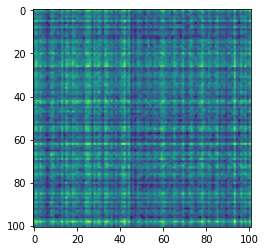

In [18]:
plt.imshow(xtrue, vmin=np.min(xtrue), vmax=np.max(xtrue))

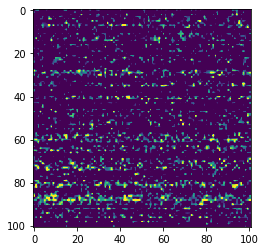

In [21]:
plt.imshow(ret_prod-xtrue, vmin=np.min(xtrue)*.1, vmax=np.max(xtrue)*.1)